## Preprocessing

In [25]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [26]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN","NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [27]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [28]:
aff_counts = application_df["AFFILIATION"].value_counts()
aff_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

In [29]:
# Choose a cutoff value and create a list of affiliation types to be replaced
# use the variable name `affiliation_types_to_replace`
affiliation_types_to_replace = list(aff_counts[aff_counts<100].index)

# Replace in dataframe
for aff in affiliation_types_to_replace:
    application_df['AFFILIATION'] = application_df['AFFILIATION'].replace(aff,"Other_Affiliation")

# Check to make sure binning was successful
application_df['AFFILIATION'].value_counts()

Independent          18480
CompanySponsored     15705
Other_Affiliation      114
Name: AFFILIATION, dtype: int64

In [30]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df["APPLICATION_TYPE"].value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [31]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(app_counts[app_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [32]:
# Look at CLASSIFICATION value counts for binning
classif_counts = application_df["CLASSIFICATION"].value_counts()
classif_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [33]:
# You may find it helpful to look at CLASSIFICATION value counts >100
filtered_classif_counts = classif_counts[classif_counts>100]
filtered_classif_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [34]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classif_counts[classif_counts<100].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: CLASSIFICATION, dtype: int64

In [35]:
income_counts = application_df["INCOME_AMT"].value_counts()
income_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

In [36]:
# create a function to bin INCOME_AMT
def encode_income(value):
    """
    This function encodes INCOME_AMT by setting 0 as 0 and any income as 1.
    """
    if value == '0':
        return 0
    else:
        return 1

# Call the encode_income function on the INCOME_AMT column
application_df['INCOME_AMT'] = application_df['INCOME_AMT'].apply(encode_income)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,1,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,1,N,142590,1


In [37]:
def encode_considerations(value):
    """
    This function encodes SPECIAL_CONSIDERATIONS by setting 'Y' as 1 and 'N' as 0.
    """
    if value == 'Y':
        return 1
    else:
        return 0

# Call the encode_considerations function on the SPECIAL_CONSIDERATIONS column
application_df['SPECIAL_CONSIDERATIONS'] = application_df['SPECIAL_CONSIDERATIONS'].apply(encode_considerations)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,0,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1,0,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,0,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,1,0,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,1,0,142590,1


In [38]:
# Convert categorical data to numeric with `pd.get_dummies`
numeric_df = pd.get_dummies(application_df)
numeric_df.head()

,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,...,CLASSIFICATION_Other,USE_CASE_CommunityServ,USE_CASE_Heathcare,USE_CASE_Other,USE_CASE_Preservation,USE_CASE_ProductDev,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust
0,1,0,0,5000,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,1,1,0,108590,1,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,1,0,0,5000,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3,1,1,0,6692,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,1,1,0,142590,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:
# Split our preprocessed data into our features and target arrays
y = numeric_df["IS_SUCCESSFUL"].values
X = numeric_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

<ipython-input-39-3edc0911b9f9>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = numeric_df.drop(["IS_SUCCESSFUL"],1).values


In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.6 MB/s eta 0:00:00


In [41]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=37))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [42]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

Reloading Tuner from ./untitled_project/tuner0.json


In [43]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 56 Complete [00h 00m 42s]
val_accuracy: 0.719883382320404

Best val_accuracy So Far: 0.7322449088096619
Total elapsed time: 00h 22m 22s


In [44]:
# Get best 3 model hyperparameters
best_hyper = tuner.get_best_hyperparameters(3)
for param in best_hyper:
  print(param.values)

{'activation': 'tanh', 'first_units': 5, 'num_layers': 6, 'units_0': 1, 'units_1': 5, 'units_2': 7, 'units_3': 3, 'units_4': 9, 'units_5': 3, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0046'}
{'activation': 'tanh', 'first_units': 7, 'num_layers': 6, 'units_0': 9, 'units_1': 5, 'units_2': 1, 'units_3': 9, 'units_4': 7, 'units_5': 9, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 7, 'num_layers': 3, 'units_0': 1, 'units_1': 7, 'units_2': 3, 'units_3': 5, 'units_4': 1, 'units_5': 7, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0039'}


In [47]:
# Evaluate best 3 models against full test data
best_model = tuner.get_best_models(3)
for model in best_model:
  model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
  print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5598 - accuracy: 0.7322 - 434ms/epoch - 2ms/step
Loss: 0.559752881526947, Accuracy: 0.7322449088096619
268/268 - 0s - loss: 0.5549 - accuracy: 0.7311 - 440ms/epoch - 2ms/step
Loss: 0.5549234747886658, Accuracy: 0.7310787439346313
268/268 - 0s - loss: 0.5571 - accuracy: 0.7311 - 396ms/epoch - 1ms/step
Loss: 0.557067334651947, Accuracy: 0.7310787439346313


In [48]:
# Creating model based on the top hyperparameter

nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=5, input_dim=37, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=1, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=5, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=7, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=3, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=9, activation="tanh"))
nn.add(tf.keras.layers.Dense(units=3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 5)                 190       
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
 dense_7 (Dense)             (None, 5)                 10        
                                                                 
 dense_8 (Dense)             (None, 7)                 42        
                                                                 
 dense_9 (Dense)             (None, 3)                 24        
                                                                 
 dense_10 (Dense)            (None, 9)                 36        
                                                                 
 dense_11 (Dense)            (None, 3)                

In [49]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [50]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20)

Epoch 1/20
804/804 [==============================] - 2s 2ms/step - loss: 0.6128 - accuracy: 0.6775
Epoch 2/20
804/804 [==============================] - 1s 2ms/step - loss: 0.5762 - accuracy: 0.7224
Epoch 3/20
804/804 [==============================] - 1s 2ms/step - loss: 0.5690 - accuracy: 0.7233
Epoch 4/20
804/804 [==============================] - 1s 2ms/step - loss: 0.5662 - accuracy: 0.7248
Epoch 5/20
804/804 [==============================] - 1s 2ms/step - loss: 0.5639 - accuracy: 0.7246
Epoch 6/20
804/804 [==============================] - 1s 2ms/step - loss: 0.5631 - accuracy: 0.7247
Epoch 7/20
804/804 [==============================] - 1s 2ms/step - loss: 0.5619 - accuracy: 0.7256
Epoch 8/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5611 - accuracy: 0.7258
Epoch 9/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5602 - accuracy: 0.7261
Epoch 10/20
804/804 [==============================] - 2s 2ms/step - loss: 0.5593 - accuracy: 0.7272

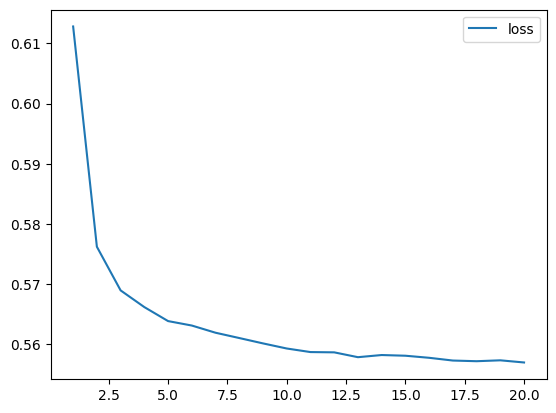

In [54]:
import matplotlib.pyplot as plt
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()

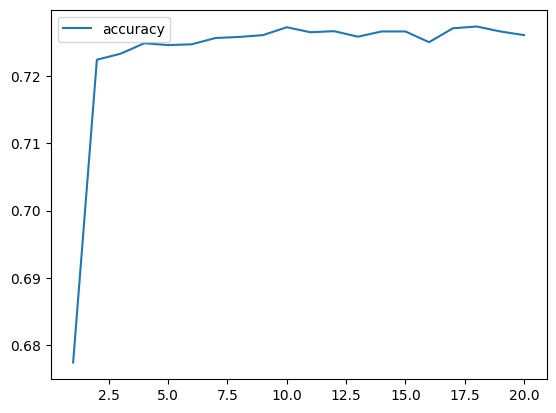

In [55]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5568 - accuracy: 0.7305 - 268ms/epoch - 1000us/step
Loss: 0.5568247437477112, Accuracy: 0.7304956316947937


In [57]:
# Export our model to HDF5 file
from google.colab import files
nn.save("AlphabetSoupCharity_Optimisation.h5")
files.download("AlphabetSoupCharity_Optimisation.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>